# Desafios
<ul>
   <li> Proporção dos inscritos por idade. </li>
   <li> Descobrir de quais estados são os inscritos com 13 anos. </li>
   <li> Adicionar título no gráfico </li>
   <li> Plotar os Histogramas das idades dos treineiro e não treineiros. </li>
   <li> Comparar as distribuições das provas em inglês espanhol </li>
   <li> Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações. </li>
</ul>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [3]:
source = "../data/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
df = pd.read_csv(source)
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


data: "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Proporção dos inscritos por idade

In [4]:
df["NU_IDADE"].value_counts(normalize = True).sort_index()

13    0.000031
14    0.001107
15    0.015772
16    0.061470
17    0.166871
        ...   
73    0.000016
75    0.000016
76    0.000008
77    0.000008
82    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

<AxesSubplot:>

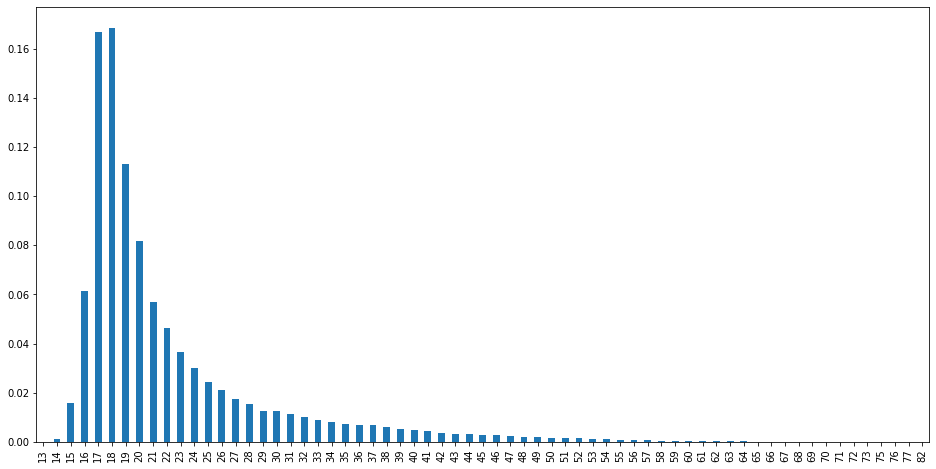

In [5]:
df["NU_IDADE"].value_counts(normalize = True).sort_index().plot.bar(figsize=(16,8))

# Descobrir de quais estados são os inscritos com 13 anos.

In [6]:
df.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

# Proporção de quais estados são os inscritos com 14 anos.

In [7]:
df.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize = True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
GO    0.048276
PB    0.048276
PI    0.048276
DF    0.027586
AM    0.027586
MT    0.027586
TO    0.020690
SE    0.020690
PR    0.020690
RO    0.013793
AL    0.013793
SC    0.013793
AC    0.006897
RS    0.006897
RN    0.006897
AP    0.006897
MS    0.006897
RJ    0.006897
ES    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

<AxesSubplot:ylabel='SG_UF_RESIDENCIA'>

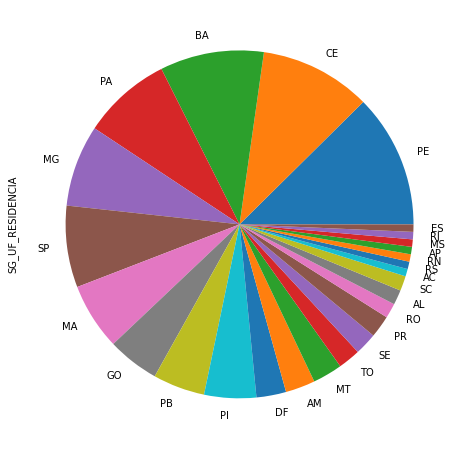

In [8]:
alunos14 =df.query("NU_IDADE <= 14")
alunos14["SG_UF_RESIDENCIA"].value_counts().plot.pie(figsize=(16,8))

<AxesSubplot:>

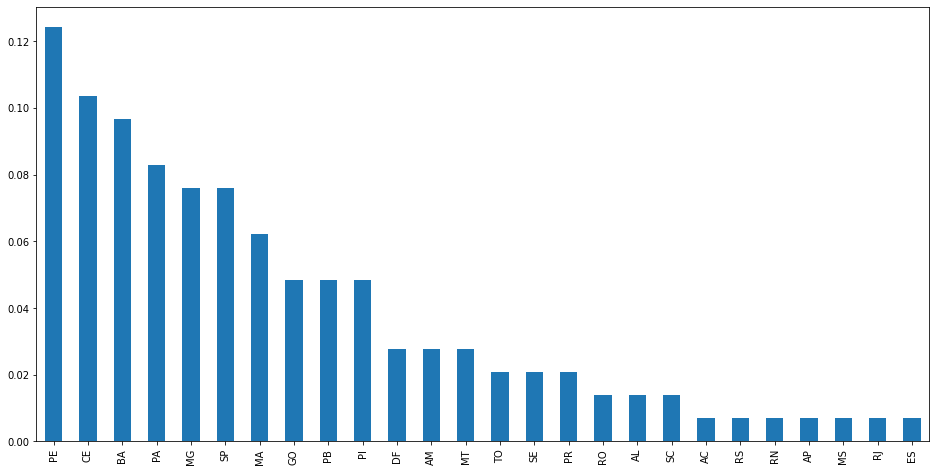

In [9]:
alunos14["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(16,8))

# Proporção de quais estados de alunos com idade menores de 18 anos.

<AxesSubplot:>

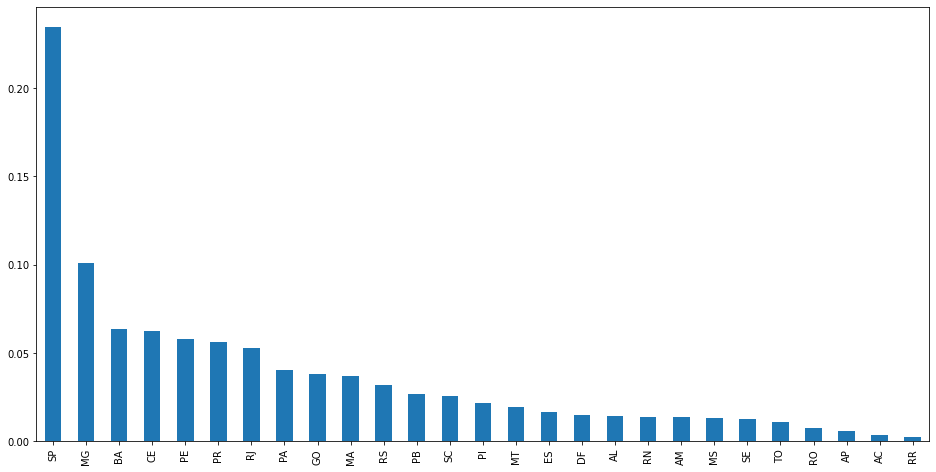

In [10]:
alunos17 =df.query("NU_IDADE <= 17")
alunos17["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.bar(figsize=(16,8))

# Analisar as idades dos do treineiro e não treineiros.

Text(0.5, 1.0, 'BoxPlot idades de treineiros por renda')

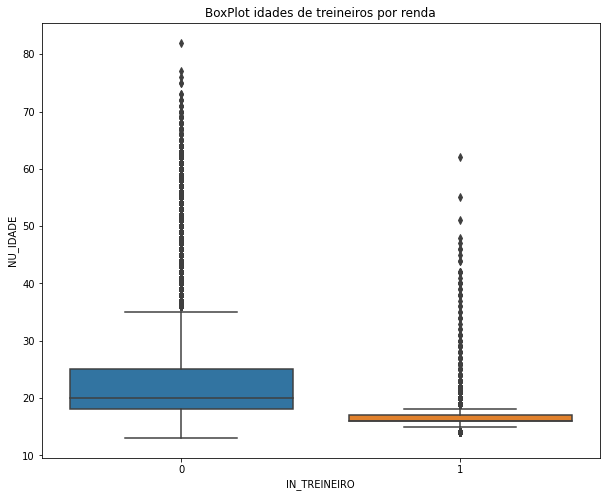

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "IN_TREINEIRO", y = "NU_IDADE", data  = df )
plt.title("BoxPlot idades de treineiros por renda")

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

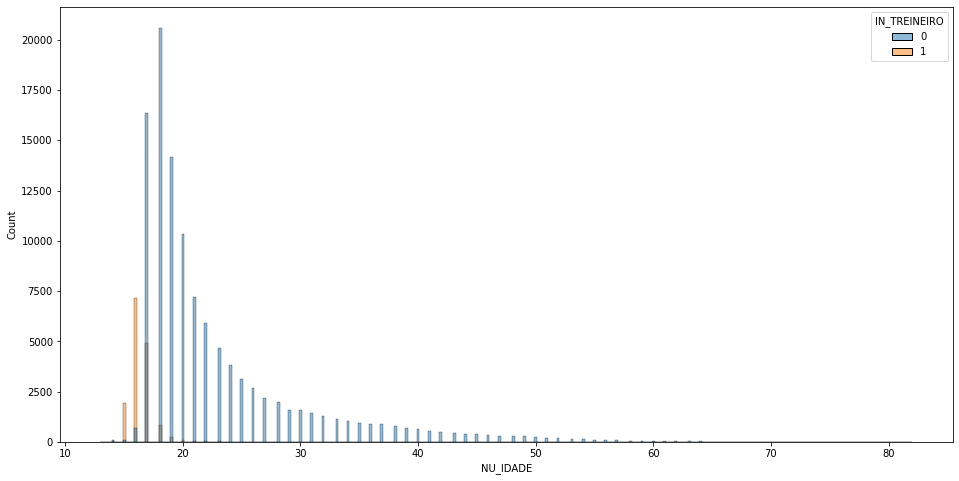

In [17]:
plt.figure(figsize=(16,8))
sns.histplot(df, x="NU_IDADE", hue="IN_TREINEIRO")

In [18]:
df_idade17 = df.query("NU_IDADE <= 17")

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

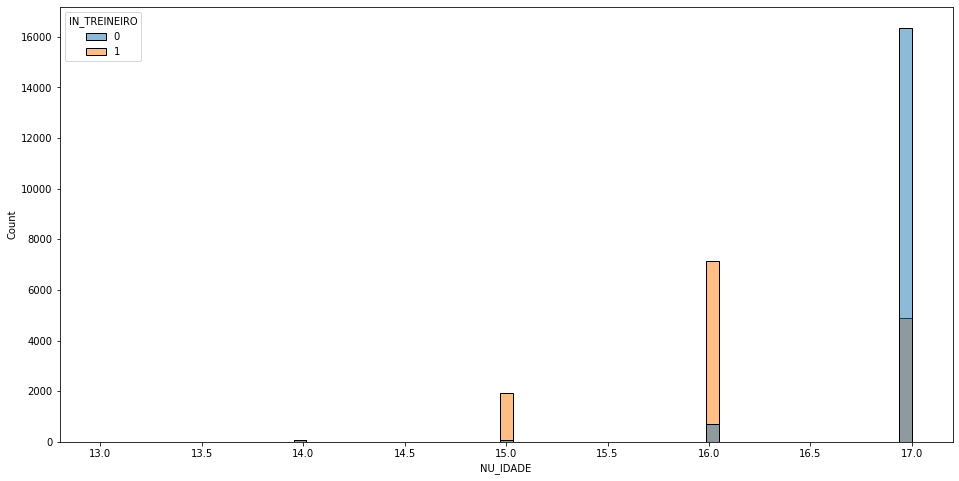

In [19]:
plt.figure(figsize=(16,8))
sns.histplot(df_idade17, x="NU_IDADE", hue="IN_TREINEIRO")

<AxesSubplot:xlabel='NU_IDADE', ylabel='Count'>

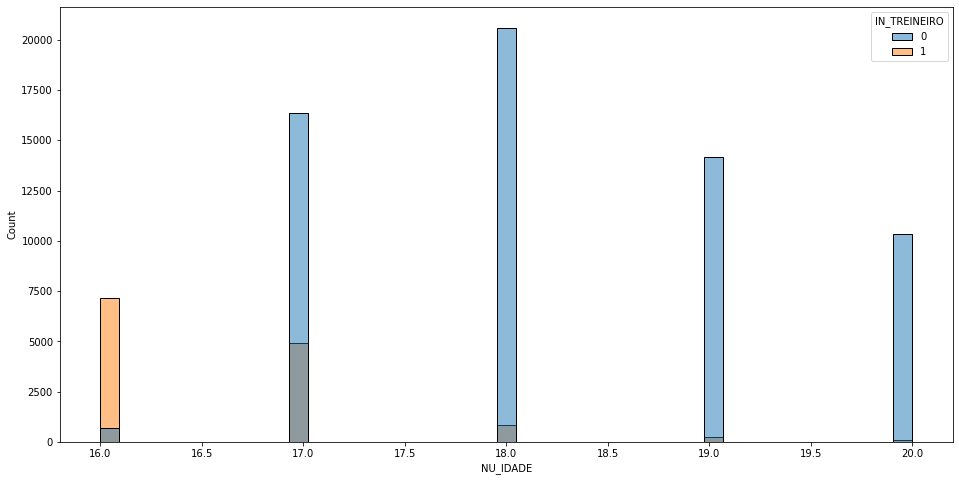

In [24]:
df_idade15_20 = df.query("NU_IDADE > 15 and NU_IDADE <= 20")
plt.figure(figsize=(16,8))
sns.histplot(df_idade15_20, x="NU_IDADE", hue="IN_TREINEIRO")

# Analisar as distribuição das Notas

In [32]:
renda_ord = df["Q006"].unique()
renda_ord.sort()
provas = ["NU_NOTA_MT", "NU_NOTA_REDACAO", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC"]

In [33]:
df["NU_NOTA_TOTAL"] = df[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")

Text(0.5, 1.0, 'BoxPlot notas total por renda')

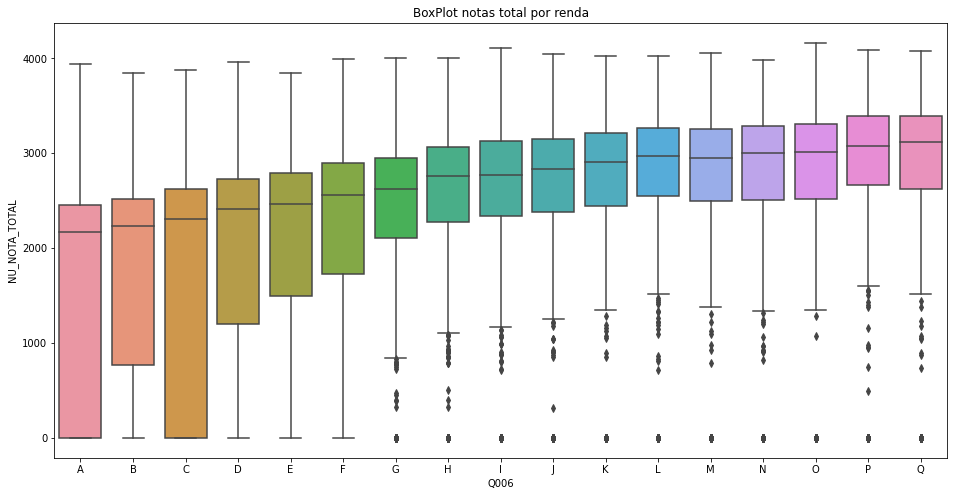

In [34]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL", data  = df, order = renda_ord )
plt.title("BoxPlot notas total por renda")

<Figure size 1152x576 with 0 Axes>

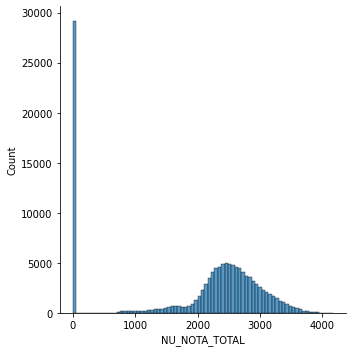

In [35]:
plt.figure(figsize=(16,8))
sns.displot(df, x = "NU_NOTA_TOTAL")

In [36]:
df_sem_notas_zero = df.query("NU_NOTA_TOTAL != 0")
df_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


In [37]:
def box(dfd, nota):
  plt.figure(figsize=(14,8))
  sns.boxplot(x = "Q006", y = nota, data  = dfd, hue="IN_TREINEIRO", order = renda_ord )
  plt.title("BoxPlot " +  nota + " por renda") 

def box_c(dfd, quest, nota):
  plt.figure(figsize=(14,8))
  sns.boxplot(x = "Q006", y = nota, data  = dfd, hue= quest, order = renda_ord )
  plt.title("BoxPlot " +  nota + " por renda") 

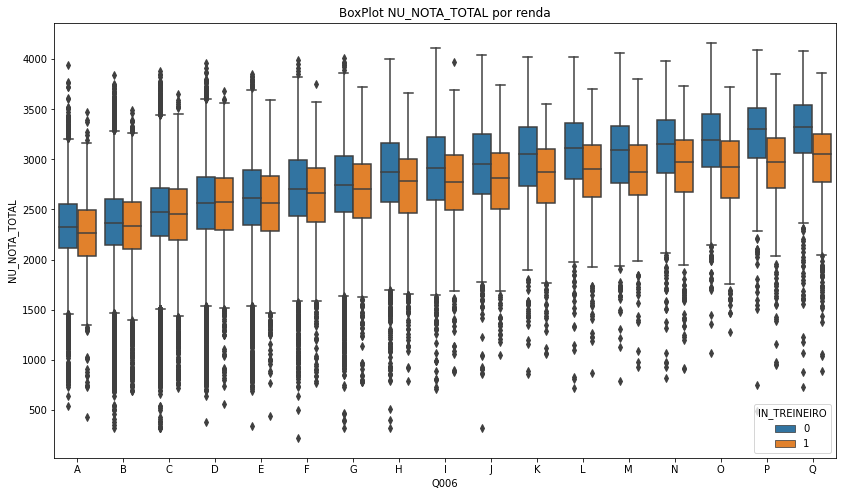

In [38]:
box(df_sem_notas_zero, "NU_NOTA_TOTAL") 

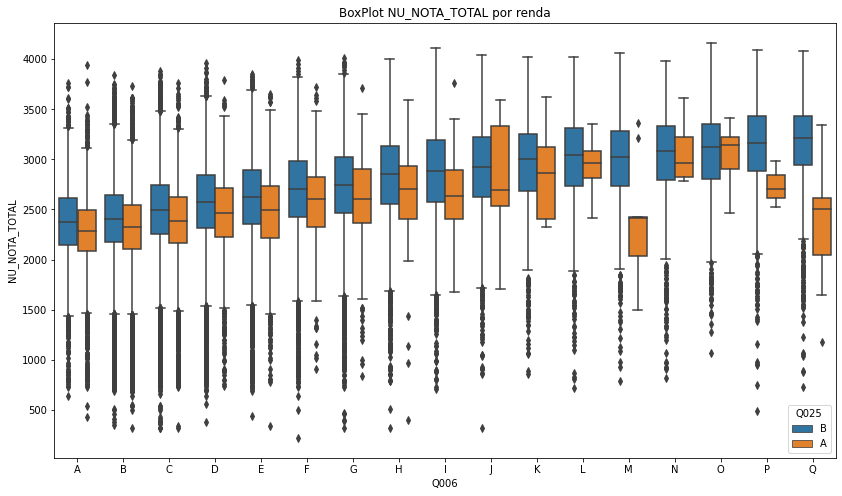

In [39]:
box_c(df_sem_notas_zero,  "Q025", "NU_NOTA_TOTAL") 

Text(0.5, 1.0, 'BoxPlot notas total por acesso a internet')

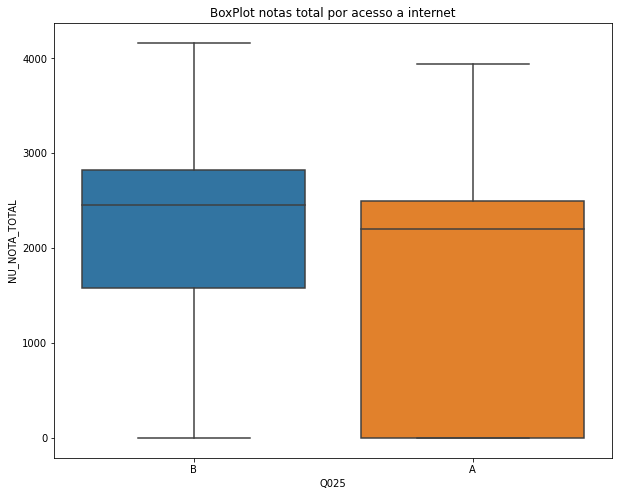

In [40]:
plt.figure(figsize=(10,8))
sns.boxplot(x = "Q025", y = "NU_NOTA_TOTAL", data  = df)
plt.title("BoxPlot notas total por acesso a internet")

In [41]:
veiculo_ord = df["Q010"].unique()
veiculo_ord.sort()
veiculo_ord

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

Text(0.5, 1.0, 'BoxPlot notas total por renda')

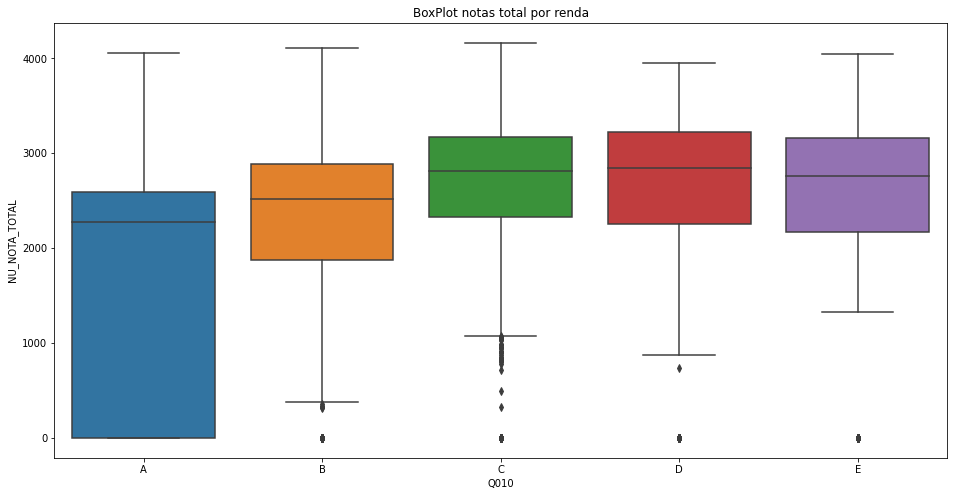

In [46]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Q010", y = "NU_NOTA_TOTAL", data  = df, order = veiculo_ord )
plt.title("BoxPlot notas total por renda")

Text(0.5, 1.0, 'BoxPlot notas total por renda')

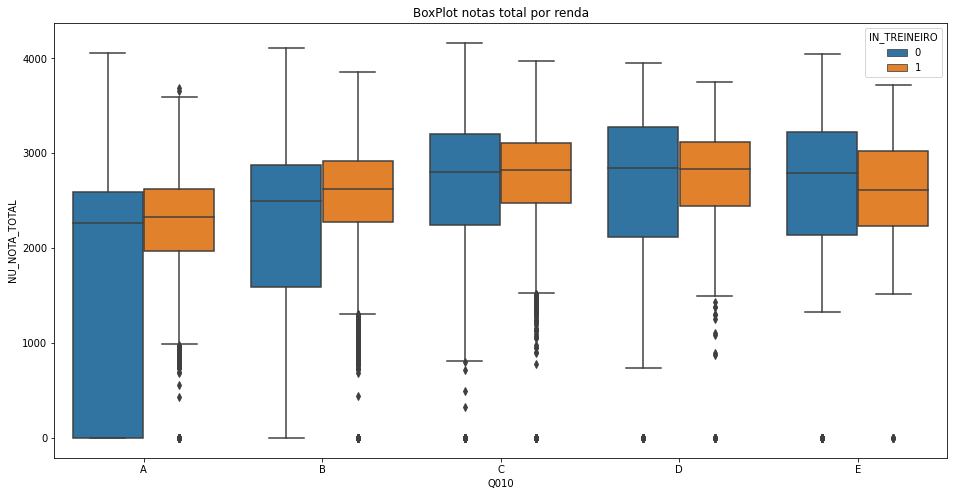

In [45]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Q010", y = "NU_NOTA_TOTAL", hue="IN_TREINEIRO", data  = df, order = veiculo_ord )
plt.title("BoxPlot notas total por renda")

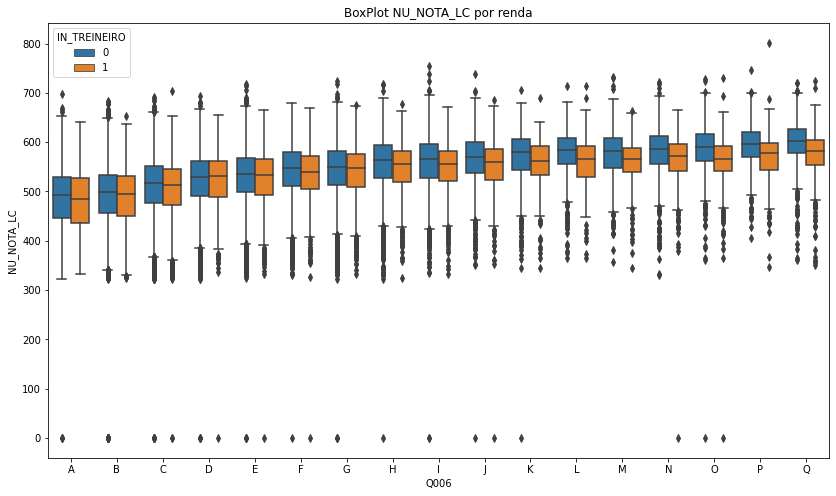

In [44]:
box(df_sem_notas_zero, "NU_NOTA_LC") 

# Comparar as notas das provas em inglês e espanhol

<Figure size 1152x576 with 0 Axes>

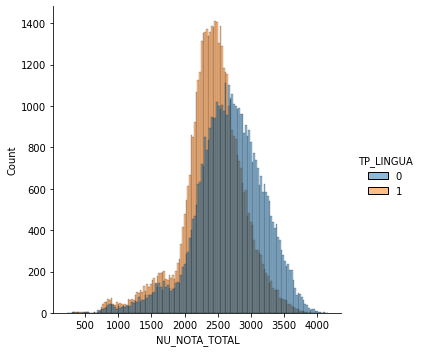

In [51]:
plt.figure(figsize=(16,8))
sns.displot(df_sem_notas_zero, x = "NU_NOTA_TOTAL",  hue= "TP_LINGUA")

Text(0.5, 1.0, 'BoxPlot Notas Tipo de Renda e Língua Estrangeira')

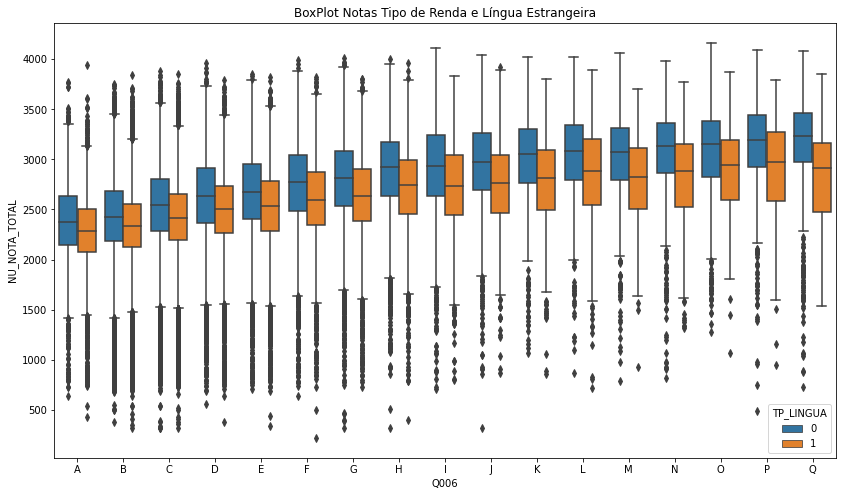

In [52]:
plt.figure(figsize=(14,8))
sns.boxplot(x = "Q006", y = "NU_NOTA_TOTAL", data  = df_sem_notas_zero, hue= "TP_LINGUA", order = renda_ord )
plt.title("BoxPlot Notas Tipo de Renda e Língua Estrangeira") 